# Import module

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list]

['NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunpen',
 'Nanum Brush Script',
 'NanumBarunpen',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumSquareRound',
 'Nanum Pen Script']

In [3]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium

In [4]:
plt.rcParams["font.family"] = 'NanumGothic'

In [5]:
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [ ]:
# mpl.rcParams['axes.unicode_minus'] = False

In [7]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.5.3
설치 위치:  /home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/dhc4003/.config/matplotlib
캐시 위치:  /home/dhc4003/.cache/matplotlib


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Make dataframe

In [ ]:
bike_path='data/'
bike_list=os.listdir(bike_path)
df=[]
for file in bike_list:
    file_path=os.path.join(bike_path,file)
    file_name='bike_'+file_path.split('.')[0][-4:]
    file_name=pd.read_csv(file_path,low_memory=False)
    df.append(file_name)

In [ ]:
weather_path='weather/'
weather_list=os.listdir(weather_path)
weather_df=[]
for file in weather_list:
    file_path=os.path.join(weather_path,file)
    file_name='weather_'+file_path.split('.')[0][-4:]
    file_name=pd.read_excel(file_path)
    weather_df.append(file_name)

In [ ]:
df_rent_group = df[2].groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent_group.head()
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

,대여일자,대여연월,대여연도,대여월,대여일,대여요일,대여수
0,2020-01-01,2020-01,2020,1,1,2,15697
1,2020-01-02,2020-01,2020,1,2,3,27841
2,2020-01-03,2020-01,2020,1,3,4,29654
3,2020-01-04,2020-01,2020,1,4,5,24707
4,2020-01-05,2020-01,2020,1,5,6,22391


In [ ]:
df[2].hist(figsize = (15,15), bins=25)

<AxesSubplot:xlabel='대여일자'>

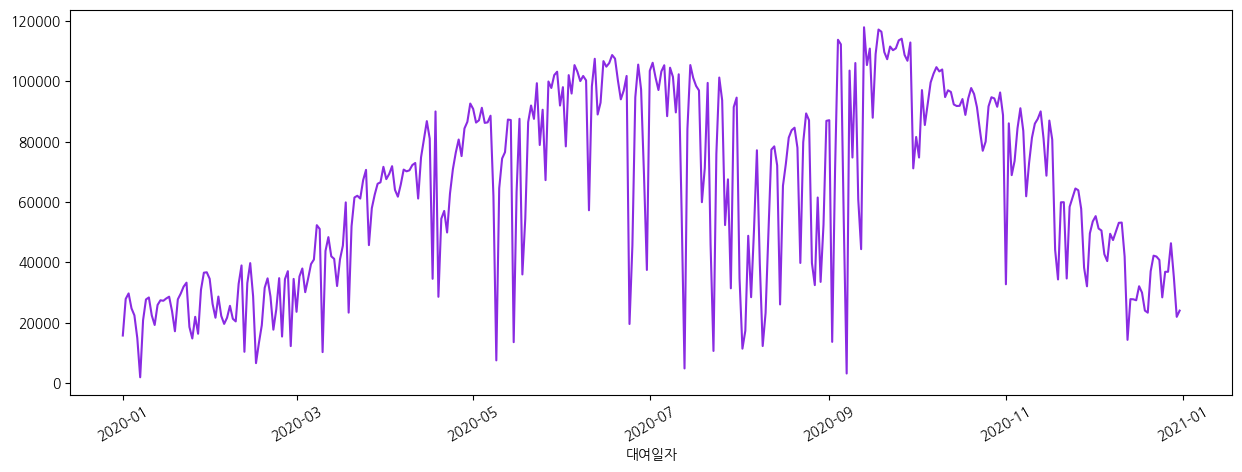

In [ ]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5) ,color='blueviolet')

<AxesSubplot:xlabel='대여연월', ylabel='대여수'>

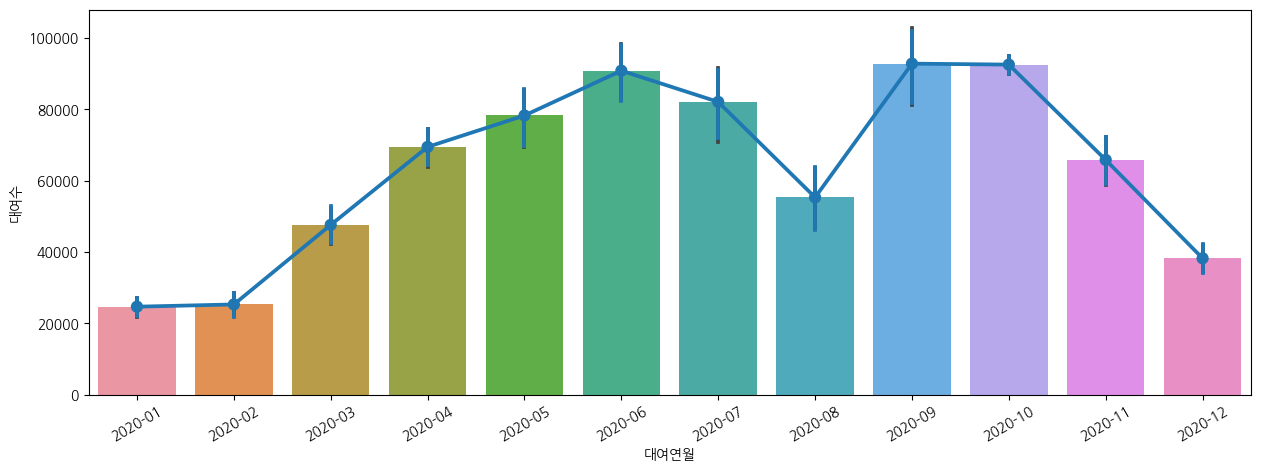

In [ ]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

In [ ]:
#일자별 대여수 
df_rent_day = df_rent.groupby(["대여일자"])["대여수"].mean()
df_rent_day.head()

대여일자
2020-01-01    15697.0
2020-01-02    27841.0
2020-01-03    29654.0
2020-01-04    24707.0
2020-01-05    22391.0
Name: 대여수, dtype: float64

In [ ]:
#월별 대여수 평균 (sum으로 하면 합)
df_rent_month = df_rent.groupby(["대여연월"])["대여수"].mean()
df_rent_month.head()

대여연월
2020-01    24696.677419
2020-02    25319.896552
2020-03    47622.451613
2020-04    69480.466667
2020-05    78288.967742
Name: 대여수, dtype: float64

# 제대로(2022년도)

In [36]:
df_2022=pd.read_csv('/home/dhc4003/ddareung/data/seoul_bike_2022.csv',low_memory=False)

### 보니까 대여소가 102번호 이상인거부터 5855 이하까지 유효

In [37]:
df_2022=df_2022[(df_2022.loc[:,'대여대여소']>=102) & (df_2022.loc[:,'대여대여소']<=5855) & (df_2022.loc[:,'반납대여소']>=102) & (df_2022.loc[:,'반납대여소']<=5855)]
df_2022.tail()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리
18274758,2022-06-28 21:21:40,255,도림사거리,0,2022-06-28 21:28:13,5852,대림동현대2차 201동 앞,0,6,846.63
18274759,2022-06-29 02:53:22,281,신동아아파트 앞,99,2022-06-29 02:59:24,5852,대림동현대2차 201동 앞,99,6,620.00
18274760,2022-06-29 10:15:15,1961,신도림테크노근린공원,0,2022-06-29 10:20:31,5852,대림동현대2차 201동 앞,0,5,750.51
18274761,2022-06-29 14:49:09,1961,신도림테크노근린공원,0,2022-06-29 15:49:09,5852,대림동현대2차 201동 앞,0,60,820.00
18274762,2022-06-30 22:24:05,1913,구로리공원,0,2022-06-30 22:34:23,5852,대림동현대2차 201동 앞,0,10,1671.88


In [38]:
df_2022["대여연월"] = df_2022["대여일시"].apply(lambda x : x[:7])
df_2022["대여일시"]=pd.to_datetime(df_2022["대여일시"])

df_2022["대여연도"] = df_2022["대여일시"].dt.year
df_2022["대여월"] = df_2022["대여일시"].dt.month
df_2022["대여일"] = df_2022["대여일시"].dt.day
df_2022["대여시간"] = df_2022["대여일시"].dt.hour
df_2022["대여요일"] = df_2022["대여일시"].dt.dayofweek
df_2022["대여일자"] = df_2022["대여일시"].dt.date

df_2022["반납연월"] = df_2022["반납일시"].apply(lambda x : x[:7])
df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])

df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])
df_2022["반납연도"] = df_2022["반납일시"].dt.year
df_2022["반납월"] = df_2022["반납일시"].dt.month
df_2022["반납일"] = df_2022["반납일시"].dt.day
df_2022["반납시간"] = df_2022["반납일시"].dt.hour
df_2022["반납요일"] = df_2022["반납일시"].dt.dayofweek
df_2022["반납일자"] = df_2022["반납일시"].dt.date

In [14]:
#요일별 이용량 알아보기
use_by_dayofweek = df_2022.groupby('대여요일').size()
use_by_dayofweek.index = "월 화 수 목 금 토 일".split()
use_by_dayofweek

월    2696443
화    2812223
수    2598636
목    2630898
금    2775865
토    2474374
일    2283325
dtype: int64

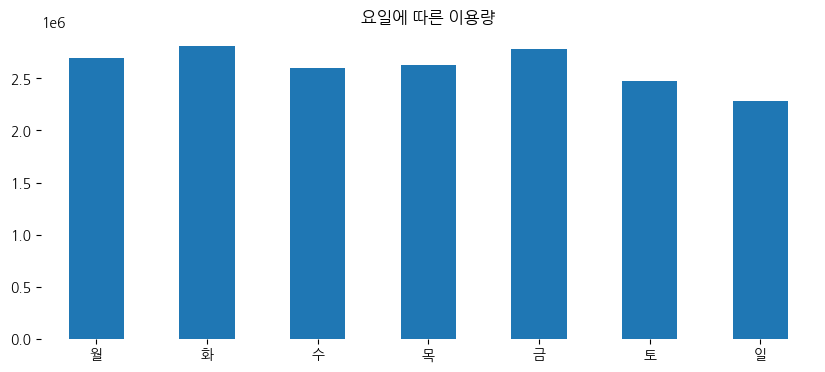

In [15]:
ax = use_by_dayofweek.plot.bar(
    rot=0,
    title="요일에 따른 이용량",
    figsize=(10, 4)
)
ax.set_frame_on(False)

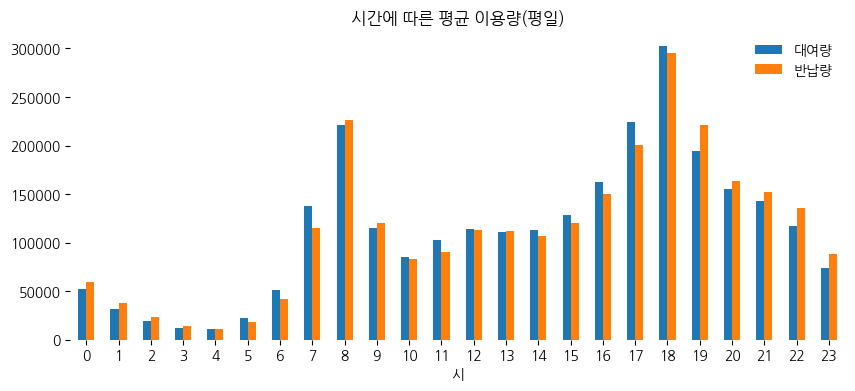

In [16]:
# 평일

ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] < 5].groupby('대여시간').size() // 5,
        "반납량": df_2022[df_2022['대여요일'] < 5].groupby('반납시간').size() // 5
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(평일)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False)



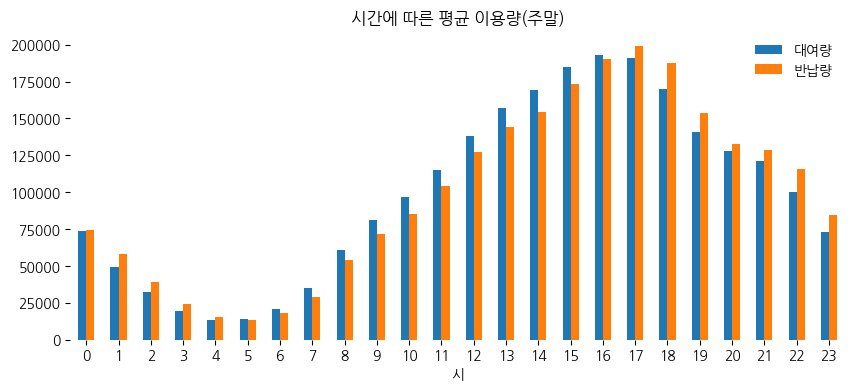

In [17]:
# 주말

ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] >= 5].groupby('대여시간').size() // 2,
        "반납량": df_2022[df_2022['대여요일'] >= 5].groupby('반납시간').size() // 2
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(주말)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

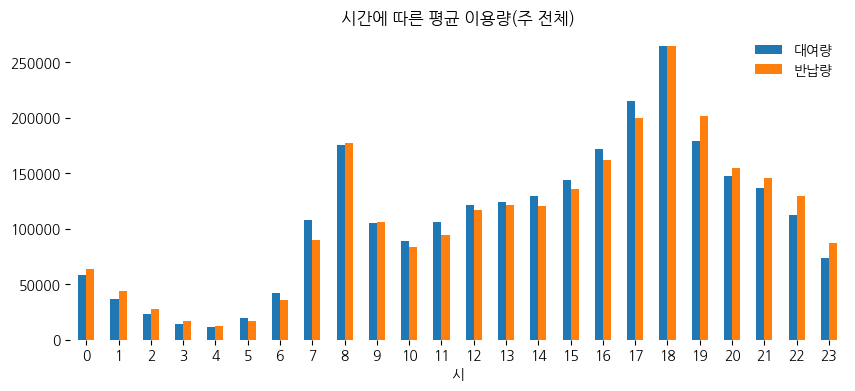

In [18]:
# 시간대별 이용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022.groupby('대여시간').size() // 7,
        "반납량": df_2022.groupby('반납시간').size() // 7
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(주 전체)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

평일의 경우, 대여/반납 시간대가 모두 8시와 18시에 몰려있다. 주로 출퇴근 시간에 몰린듯 하다.

주말의 경우, 밤시간대로 갈수록 몰린다. 주로 18시 전후로 최고치를 찍는다.

한편, 출근시간 제외하고, 일반적으로 낮에는 대여량 > 반납량이고, 밤에는 그 반대다.

### 평일에서의 시간대별 사용량을 살펴보자!

In [39]:
### 거치소 dataframe
rental_df=pd.read_csv('./rental_spot.csv',low_memory=False,encoding='cp949')
del rental_df['LCD']
del rental_df['QR']
rental_df_gu=rental_df[['대여소번호','자치구']]
rental_df_gu.columns=['대여대여소','대여지역']
return_df_gu=rental_df[['대여소번호','자치구']]
return_df_gu.columns=['반납대여소','반납지역']
rental_df_gu
return_df_gu

,반납대여소,반납지역
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2648,5851,영등포구
2649,5852,영등포구
2650,5853,영등포구
2651,5854,영등포구


In [40]:
### 2022 dataframe과 대여소번호를 key로 삼아 자치구만 추가해주기(대여지역의 자치구)
df_2022=pd.merge(left = df_2022 , right = rental_df_gu, how = "inner", on = "대여대여소")
df_2022=pd.merge(left = df_2022 , right = return_df_gu, how = "inner", on = "반납대여소")
df_2022.isnull().sum()

대여일시       0
대여대여소      0
대여대여소이름    0
대여거치대      0
반납일시       0
반납대여소      0
반납대여소이름    0
반납거치대      0
이용시간       0
이용거리       0
대여연월       0
대여연도       0
대여월        0
대여일        0
대여시간       0
대여요일       0
대여일자       0
반납연월       0
반납연도       0
반납월        0
반납일        0
반납시간       0
반납요일       0
반납일자       0
대여지역       0
반납지역       0
dtype: int64

In [ ]:
#대여지역구와 반납지역구가 다른 경우
df_2022[df_2022['대여지역']!=df_2022['반납지역']]

In [28]:
_df = df_2022[df_2022['대여요일'] < 5].groupby(['대여지역', '대여시간']).size() // 5
_df

대여지역  대여시간
강남구   0       1623
      1       1052
      2        724
      3        480
      4        330
              ... 
중랑구   19      5727
      20      4810
      21      4526
      22      3689
      23      2582
Length: 600, dtype: int64

In [30]:
pvt_table = _df.unstack()
pvt_table.head()

대여시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
대여지역,,,,,,,,,,,,,,,,,,,,,
강남구,1623,1052,724,480,330,556,1349,3171,5458,3499,...,3529,4089,5417,8196,10649,5958,4350,3870,3123,1981
강동구,2269,1319,848,529,463,1304,2885,6661,9025,4643,...,4674,5230,6820,8707,11221,8445,6796,6536,5156,3288
강북구,1140,807,581,418,335,427,784,1559,2506,1600,...,1750,2043,2429,2988,3949,2848,2470,2378,1948,1455
강서구,4143,2435,1488,916,952,2397,6762,19151,30961,13250,...,11591,13398,17162,24380,34424,21972,16721,15210,12050,7164
관악구,2236,1367,976,651,539,810,1429,3521,5519,3065,...,2912,3225,3880,5078,6970,5753,5078,4901,4342,3059


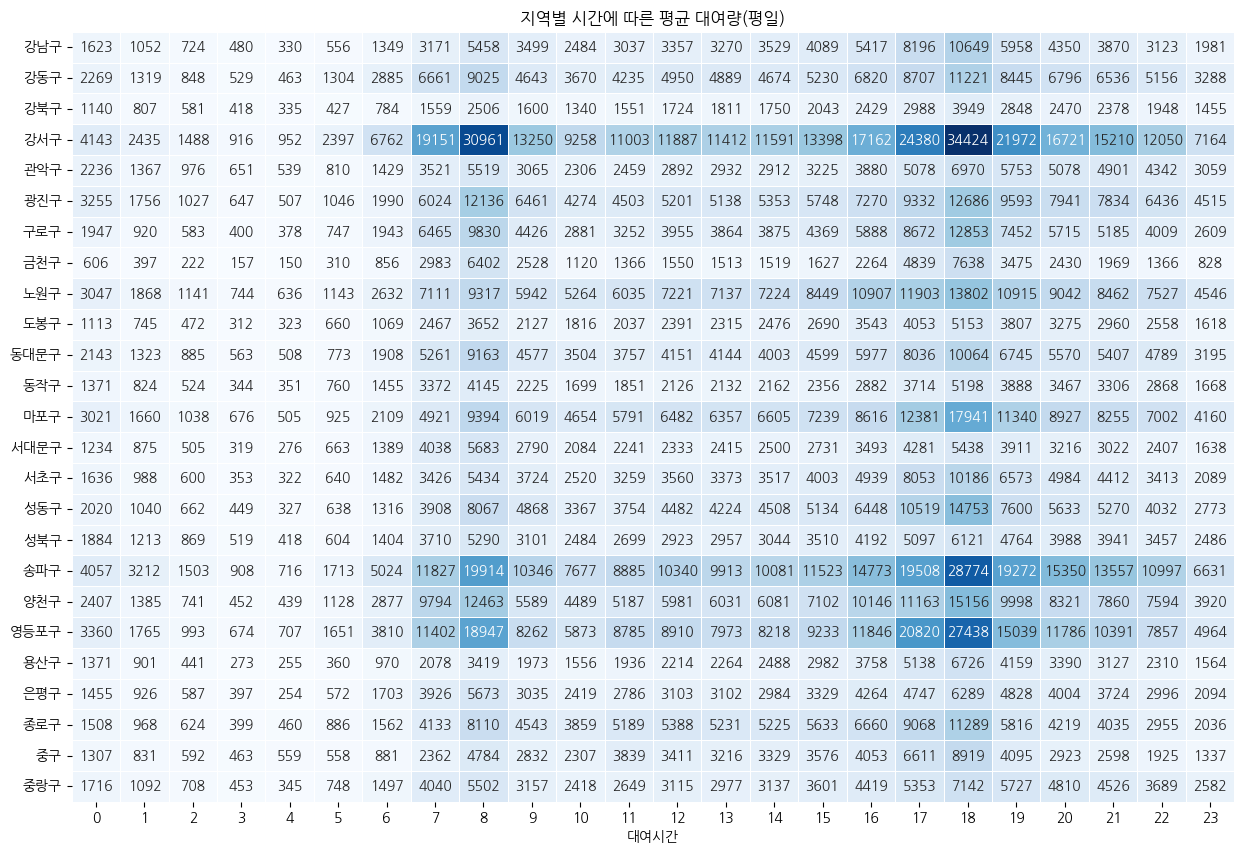

In [44]:
_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pvt_table,
    annot=True,
    fmt='d',
    cmap="Blues",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("지역별 시간에 따른 평균 대여량(평일)")
ax.set_ylabel("");

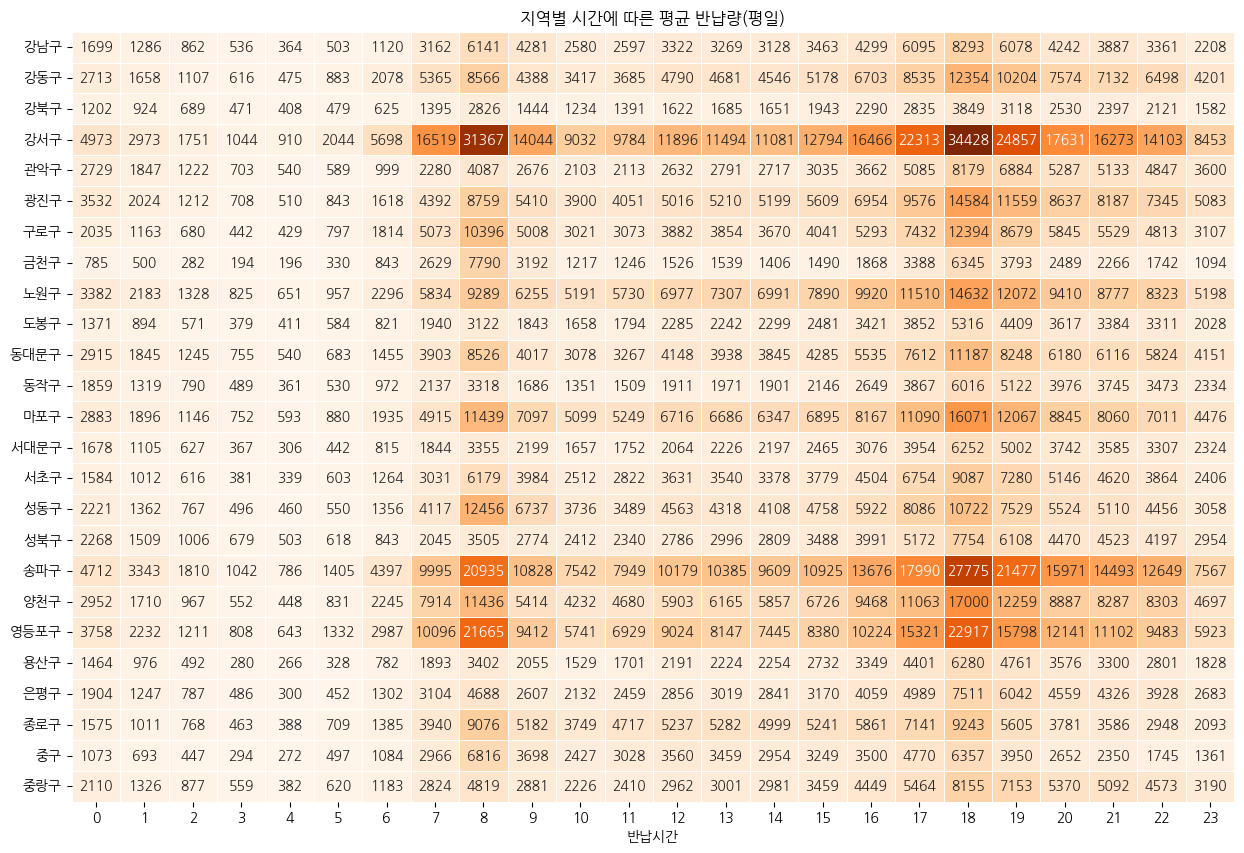

In [45]:
# 반납

pvt_table = (
    df_2022[df_2022['대여요일'] < 5].groupby(['반납지역', '반납시간']).size() // 5
).unstack()

_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pvt_table,
    annot=True,
    fmt='d',
    cmap="Oranges",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("지역별 시간에 따른 평균 반냡량(평일)")
ax.set_ylabel("");

강서구, 송파구, 영등포구 공통적으로 대여, 반납 많음

출퇴근 시간에 공통적으로 색이 진하게 그려져 있음

그러면 출퇴근 시간에 대여량이 반납량보다 높은지역은?

반대로 반납량이 대여량보다 많은 지역은?

In [52]:
# 아래 pvt_table에서 각 대여지역의 8시 데이터만 가져와보자.

pvt_table = (
    df_2022[df_2022['대여요일'] < 5].groupby(['대여지역', '대여시간']).size() // 5
)
#index level 대여시간에서 8시인것만
pvt_table.xs(8, level=1)

대여지역
강남구      5438
강동구      9025
강북구      2506
강서구     30931
관악구      5519
광진구     12136
구로구      9813
금천구      6402
노원구      9317
도봉구      3650
동대문구     9162
동작구      4091
마포구      9328
서대문구     5653
서초구      5418
성동구      8062
성북구      5269
송파구     19906
양천구     12448
영등포구    18113
용산구      3350
은평구      5637
종로구      7981
중구       4697
중랑구      5502
dtype: int64

In [54]:
# 대여

rent = pd.DataFrame(
#    data={8: pvt_table.xs(8, level=1), 18: pvt_table.xs(18, level=1)}
    data=[pvt_table.xs(8, level=1), pvt_table.xs(18, level=1)], index=[8, 18]
)
rent

대여지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,5438,9025,2506,30931,5519,12136,9813,6402,9317,3650,...,8062,5269,19906,12448,18113,3350,5637,7981,4697,5502
18,10629,11220,3946,34357,6967,12683,12837,7636,13793,5125,...,14742,6120,28758,15116,27166,6693,6274,11181,8887,7141


In [55]:
# 반납

pvt_table = (
    df_2022[df_2022['대여요일'] < 5].groupby(['반납지역', '반납시간']).size() // 5
)
rtrn = pd.DataFrame(
    data = [pvt_table.xs(8, level=1), pvt_table.xs(18, level=1)],
    index=[8, 18]
)
rtrn

반납지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,6141,8566,2826,31367,4087,8759,10396,7790,9289,3122,...,12456,3505,20935,11436,21665,3402,4688,9076,6816,4819
18,8293,12354,3849,34428,8179,14584,12394,6345,14632,5316,...,10722,7754,27775,17000,22917,6280,7511,9243,6357,8155


In [57]:
total = rent + rtrn
total

대여지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,11579,17591,5332,62298,9606,20895,20209,14192,18606,6772,...,20518,8774,40841,23884,39778,6752,10325,17057,11513,10321
18,18922,23574,7795,68785,15146,27267,25231,13981,28425,10441,...,25464,13874,56533,32116,50083,12973,13785,20424,15244,15296


In [58]:
rent = rent / total
rtrn = rtrn / total

In [60]:
morning_diff = pd.DataFrame(
    data={'대여': rent.loc[8], '반납': rtrn.loc[8]}
).sort_values('대여')
morning_diff

,대여,반납
성동구,0.392923,0.607077
중구,0.407974,0.592026
마포구,0.449174,0.550826
금천구,0.451099,0.548901
영등포구,0.455352,0.544648
서초구,0.467190,0.532810
종로구,0.467902,0.532098
강남구,0.469643,0.530357
강북구,0.469992,0.530008
구로구,0.485576,0.514424


In [61]:
dinner_diff = pd.DataFrame(
    data={'대여': rent.loc[18], '반납': rtrn.loc[18]}
).sort_values('대여')
dinner_diff

,대여,반납
성북구,0.441113,0.558887
은평구,0.455132,0.544868
관악구,0.459989,0.540011
동작구,0.462329,0.537671
서대문구,0.464038,0.535962
광진구,0.465141,0.534859
중랑구,0.466854,0.533146
양천구,0.470669,0.529331
동대문구,0.473528,0.526472
강동구,0.475948,0.524052


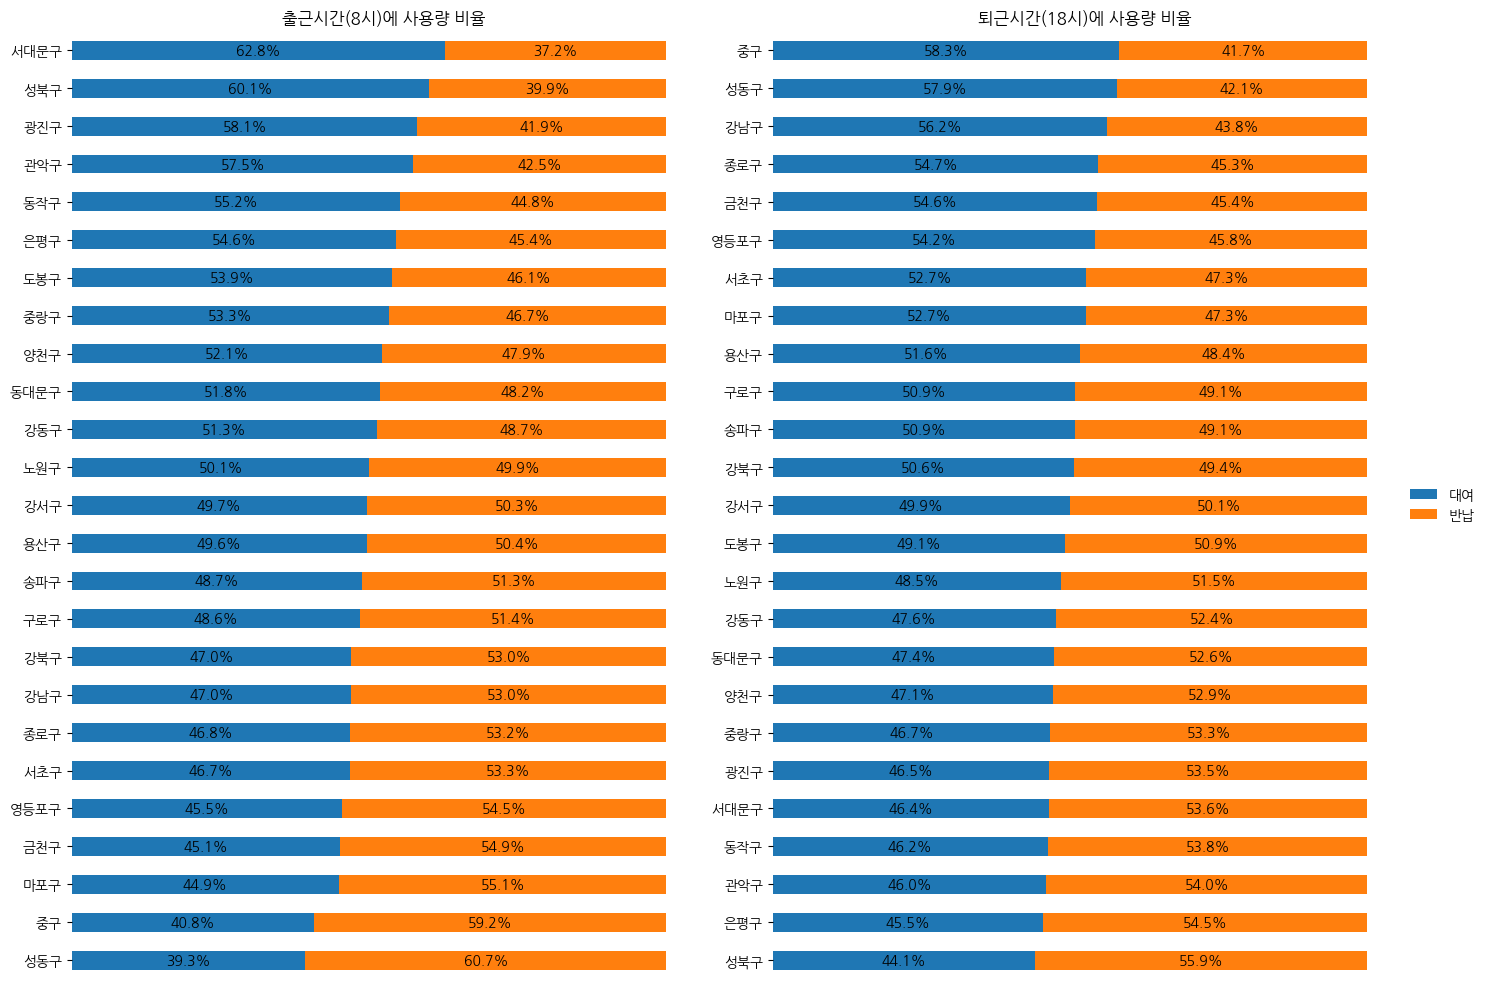

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, (diff, time_name) in enumerate(
    zip([morning_diff, dinner_diff], ["출근시간(8시)", "퇴근시간(18시)"])
):
    ax = diff.plot.barh(
        stacked=True,
        color=['C0', 'C1'],
        title=f"{time_name}에 사용량 비율",
        ax=axes[i]
    )
    for p in ax.patches: 
        x, y, width, height = p.get_bbox().bounds 
        ax.annotate(f"{width*100:.1f}%", (x+width/2, y+height/2), ha='center', va='center')
    ax.set_xticks([])
    ax.set_frame_on(False)

axes[0].get_legend().remove()
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
fig.tight_layout()

출근시간엔 서대문구가 대여가 25퍼 더 많음
퇴근시간엔 중구가 대여가 16퍼 더 많음


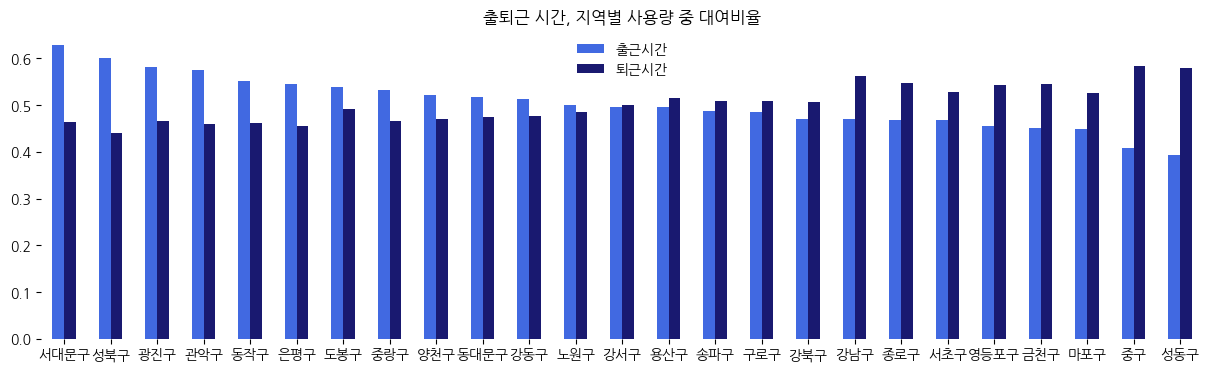

In [63]:
morning_dinner_diff = pd.DataFrame(
    data={'출근시간': morning_diff['대여'], '퇴근시간': dinner_diff['대여']}
).sort_values('출근시간', ascending=False)

ax = morning_dinner_diff.plot.bar(
    rot=0,
    color=['royalblue', 'midnightblue'],
    title="출퇴근 시간, 지역별 사용량 중 대여비율",
    figsize=(15, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

출근시간 대여가 높은 지역(서대문구, 성북구,광진구 등)-> 퇴근시간엔 반납비율 높음

거주지->근무지로 이동하는 것, 따라서 거주지역의 출근시간 대여량이 높고 , 근무지역은 퇴근시간 대여량이 높음(강남구, 종로구, 서초구, 영등포구, 금천구, 마포구, 중구, 성동구)

In [ ]:
df_return_group = df_2022.groupby(["반납대여소이름","반납대여소"])["반납일시"].count()
df_return = pd.DataFrame(df_return_group).reset_index()
df_return.columns = ["반납대여소이름","반납대여소", "반납수"]
df_return

,반납대여소이름,반납대여소,반납수
0,(시립)고덕평생학습관,1070,3529
1,(재)FITI시험연구원,2724,9016
2,3645 구역삼세무서 교차로,4902,1814
3,3919 CGV구로 앞,3886,5835
4,3호선 매봉역 3번출구앞,2335,10406
...,...,...,...
2627,흥국사 정류장,991,819
2628,희성오피앙,1639,7217
2629,희훈타워빌 앞,3905,9409
2630,힐스테이트에코,2720,20033


In [ ]:
near_df_207=rental_df.loc[(rental_df['자치구']=='영등포구') & (rental_df['위도']<37.54) & (rental_df['위도']>37.52)& (rental_df['경도']>126.92) & (rental_df['경도']<126.95)]
near_df_207.shape

(23, 7)

In [ ]:
for row in near_df_207.itertuples():
    print(row)

In [ ]:
# 지도의 중심 찾기
from folium.plugins import MarkerCluster

lat=rental_df['위도'].mean()
long=rental_df['경도'].mean()
myMap = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(rental_df)-1):
    x = rental_df['위도'][i]
    y = rental_df['경도'][i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = '#000000',
        fill = 'crimson',
    ).add_to(myMap)
    
folium.Marker([37.527157, 126.9319],
  popup="여의나루역 1번출구 앞",
  icon=folium.Icon(color='green', icon='fa-bicycle',prefix='fa')).add_to(myMap)

folium.CircleMarker([37.527157, 126.9319],
  radius=100,
  color='blue',
  fill_color='skyblue').add_to(myMap)

def plot(df):
    # 리스트를 이용해 여러 행의 데이터를 위,경도로 묶음
    locations = list(zip(df.위도, df.경도))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 자동차 모양의 빨간색 아이콘을 지정했다.
    icons = [folium.Icon(icon='fa-bicycle', prefix="fa", color="blue") for _ in range(len(locations))]

    # 역시 같은 원리로 아이콘을 클릭했을 때, 팝업이 생성되게 할 예정인데, 먼저 팝업 안에 들어갈 내용을 지정한다.
    popup_content = []
    for information in df.itertuples():
        # 팝업을 클릭했을 때, 시간이 나오게 하고 싶다.
        # datetime 컬럼을 pd.to_datetime 기능을 활용하여 hh:mm 포맷으로 time이라는 컬럼을 사전에 미리 만들었다.
        content = "<b>대여소번호 :{}</b>  <br /> 대여소명: {}".format(information.대여소번호, information._2)
        popup_content.append(content)

    # 팝업을 생성한다.
    popups = [folium.Popup(content, min_width=300, max_width=300) for content in popup_content]

    # 클러스터를 생성하여 앞에서 지정한 locations, icons, popups를 설정해준다.
    cluster = MarkerCluster(locations = locations, icons = icons, popups = popups,)
    # 지도에 클러스터를 추가.
    cluster.add_to(myMap)
    
plot(near_df_207)
myMap.save('index.html')

In [ ]:
# 대여량이 많은 상위 대여소 
# for i in range(5):
#     print('반납량 많은 상위 대여소 top 10\n',df[i]['반납대여소이름'].value_counts().head(5))
print('반납량 많은 상위 대여소 top 10\n',df_return.sort_values('반납수',ascending=False))

반납량 많은 상위 대여소 top 10
             반납대여소이름  반납대여소    반납수
778   뚝섬유원지역 1번출구 앞    502  81191
2454     한강공원 망원나들목   4217  75121
1831   여의나루역 1번출구 앞    207  67325
834     마곡나루역 2번 출구   2715  65651
1110        봉림교 교통섬   2102  52390
...             ...    ...    ...
2042          위트콤공장     11      4
2398        테스트 대여소   9979      3
2041            위트콤     10      3
1252         상암단말정비  99998      2
100           _도봉센터   9990      1

[2632 rows x 3 columns]


## 2018 전처리 한거 좀 column에 작은따옴표 붙어있음

In [ ]:
print(df[4]['대여대여소이름'].dtypes)
df[4]['대여대여소이름']=df[4]['대여대여소이름'].astype('object')
df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.replace("'","")
#2018
df[4].head()
df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.strip()